In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.interpolate import griddata
import imageio

# Carga de datos
### Carga de datos de las estaciones

In [31]:
#Lectura de estaciones
columns =['Estación','VelViento','DirViento','PM10','Pm2.5']
data_estaciones = pd.read_csv('../estaciones.txt',header=None, names=columns)
data_estaciones
#Bolivia porque no tiene ningun dato de PM 2.5 para el 22/01/2024
#Fontibon tiene formato diferente y extraño en fecha hora

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Estación,VelViento,DirViento,PM10,Pm2.5
1,Guaymaral,True,True,True,True
2,Suba,True,True,True,True
3,Colina,True,True,True,True
4,Bolivia,False,False,False,True
5,Usaquén,True,True,True,True
6,Las Ferias,True,True,True,True
7,Fontibón,True,True,True,True
8,Estación Movil Fontibón,False,False,True,True
9,Centro de Alto Rendimiento,True,True,True,True


### Carga de datos de polución

In [32]:
#No usamos Bolivia, Movil_Fontibon ni Usme porque para estas estaciones no hay datos del viento
files = ['Carvajal_-_Sevillana','Centro_de_Alto_Rendimiento','Ciudad_Bolivar','Colina','Guaymaral','Jazmin','Kennedy','Las_Ferias','MinAmbiente','Movil_7ma','Puente_Aranda','San_Cristobal','Suba','Tunal','Usaquen']

def read_and_rename(file_prefix):
    df_pm10 = pd.read_excel(f'raw_data/{file_prefix}_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10{file_prefix[:7]}'})
    df_pm25 = pd.read_excel(f'raw_data/{file_prefix}_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5{file_prefix[:7]}'})
    return pd.merge(df_pm10, df_pm25, on='fecha hora', how='inner')

df_enero22 = read_and_rename(files[0])
for file in files[1:]:
    df_enero22 = pd.merge(df_enero22, read_and_rename(file), on='fecha hora', how='inner')

df_enero22


,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10Puente_,PM2.5Puente_,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,NaN,4,16.0,7,48.0,18,14,11.0,10,0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,NaN,4,8.0,8,56.0,14,26,12.0,9,0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,NaN,4,8.0,7,54.0,8,23,10.0,10,5
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,NaN,4,NaN,10,41.0,23,10,5.0,19,8
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,NaN,4,10.0,10,51.0,39,10,8.0,8,4
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,NaN,4,13.0,10,70.0,36,19,13.0,8,5
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,NaN,5,19.0,9,73.0,32,25,11.0,23,8
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,5.0,5,17.0,7,97.0,21,25,11.0,22,22
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,16.0,5,12.0,12,88.0,12,31,14.0,28,11
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,25.0,5,18.0,6,74.0,7,22,22.0,14,6


In [33]:
df_enero22 = pd.merge(
    pd.merge(df_enero22,pd.read_excel('raw_data/Fontibon_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner'),
            pd.read_excel('raw_data/Fontibon_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner')
df_enero22

,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Fontibo,PM2.5Fontibo
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,16.0,7,48.0,18,14,11.0,10,0,18.0,8.0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,8.0,8,56.0,14,26,12.0,9,0,19.0,10.0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,8.0,7,54.0,8,23,10.0,10,5,14.0,12.0
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,NaN,10,41.0,23,10,5.0,19,8,11.0,8.0
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,10.0,10,51.0,39,10,8.0,8,4,11.0,10.0
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,13.0,10,70.0,36,19,13.0,8,5,20.0,11.0
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,19.0,9,73.0,32,25,11.0,23,8,32.0,20.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,17.0,7,97.0,21,25,11.0,22,22,44.0,33.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,12.0,12,88.0,12,31,14.0,28,11,33.0,19.0
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,18.0,6,74.0,7,22,22.0,14,6,20.0,11.0


In [34]:
df_enero22.shape

(24, 33)

In [35]:
df_enero22.columns

Index(['fecha hora', 'PM10Carvaja', 'PM2.5Carvaja', 'PM10Centro_',
       'PM2.5Centro_', 'PM10Ciudad_', 'PM2.5Ciudad_', 'PM10Colina',
       'PM2.5Colina', 'PM10Guaymar', 'PM2.5Guaymar', 'PM10Jazmin',
       'PM2.5Jazmin', 'PM10Kennedy', 'PM2.5Kennedy', 'PM10Las_Fer',
       'PM2.5Las_Fer', 'PM10MinAmbi', 'PM2.5MinAmbi', 'PM10Movil_7',
       'PM2.5Movil_7', 'PM10Puente_', 'PM2.5Puente_', 'PM10San_Cri',
       'PM2.5San_Cri', 'PM10Suba', 'PM2.5Suba', 'PM10Tunal', 'PM2.5Tunal',
       'PM10Usaquen', 'PM2.5Usaquen', 'PM10Fontibo', 'PM2.5Fontibo'],
      dtype='object')

In [36]:
# Rellenar los valores NaN con el valor anterior en la columna
#df_enero22.fillna(value=-1) #Aún no es inplace

In [37]:
# PM10 = df_enero22.sort_index(axis=1).drop(columns=['fecha hora']).iloc[0][:16].values #Tenemos 16 estaciones
# df_enero22.sort_index(axis=1).drop(columns=['fecha hora']).iloc[0][:16]

# Analisis de datos

In [38]:
coord = pd.read_csv('../estaciones_coord.txt')
coord.iloc[:, [0, -2, -1]].sort_values(by=['Estación'])

,Estación,y_cell,x_cell
11,Carvajal-Sevillana,4,3
6,Centro de Alto Rendimiento,6,5
13,Ciudad Bolivar,3,2
2,Colina,10,6
5,Fontibón,7,3
0,Guaymaral,12,7
12,Jazmín,4,4
8,Kennedy,5,2
4,Las Ferias,8,5
10,Ministerio de Ambiente,5,6


### Intepolacion de datos

In [39]:
def Grilla(dataframe, coord, hora, interpolar):
    PM10 = dataframe.sort_index(axis=1).drop(columns=['fecha hora']).iloc[hora][:16].values
    coord['PM10'] = PM10
    reduced_coord = coord.dropna(subset=['PM10'])
    if interpolar:
        points = np.array(reduced_coord[['x_cell', 'y_cell']])
        magnitudes = np.array(reduced_coord['PM10'])
        grid_x, grid_y = np.mgrid[0:14:14j, 0:10:10j] #Datos de 0 a 14 con una separación de 1 entre ellos, j para incluir el límite derecho

        # Interpolación para cada componente del vector
        # # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
        grid_pm10_cubic = griddata(points, magnitudes, (grid_x, grid_y), method='cubic',)
        grid_pm10_nearest = griddata(points, magnitudes, (grid_x, grid_y), method='nearest',)
        grid_interpolated = np.where(np.isnan(grid_pm10_cubic), grid_pm10_nearest, grid_pm10_cubic)
        return grid_interpolated

    else:
        Ly, Lx = 14, 10 
        grid =  np.zeros((Ly, Lx))
        values = np.array(reduced_coord[['x_cell', 'y_cell', 'PM10']]) 
        for i,j,k in values.astype(int):
            # print(i,j,k)
            grid[j,i] = k
            
        return grid

In [40]:
grid = Grilla(df_enero22, coord, 0,False)
grid_interpolated = Grilla(df_enero22, coord, 0,True)

# Visualizacion de datos

In [41]:
#@title Visualización de la grilla
def Mapa(data,save,hour):
    # Cargar la imagen de fondo
    background_image = mpimg.imread('../Map.png')
    Lx, Ly = 10, 14
    # Crear el plot
    fig, ax = plt.subplots()

    # Mostrar la imagen de fondo
    ax.imshow(background_image, extent=[0, Lx, 0, Ly], aspect='auto')

    # Mostrar la grilla coloreada sobre la imagen de fondo
    # Ajustar alpha para hacer la grilla transparente
    cax = ax.imshow(data, cmap='gray_r', extent=[0, Lx, 0, Ly], origin='lower', 
                    alpha=0.7, vmin=0, vmax=150)


    plt.colorbar(cax)
    plt.title('Densidad de polución en la grilla')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    if save:
        plt.savefig(f'Mapa_{hour}.png')
        plt.close()
    else:
        plt.show()

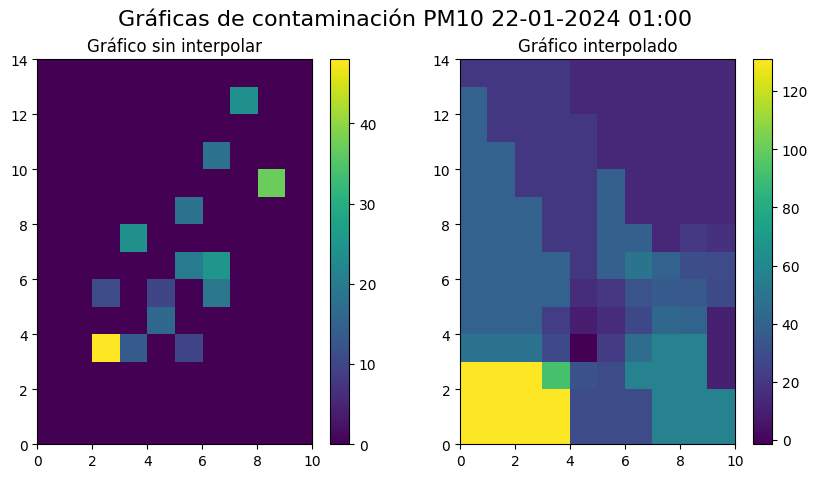

In [46]:
Ly, Lx = 14, 10 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(grid, extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar()
plt.title('Gráfico sin interpolar')

plt.subplot(1, 2, 2)
plt.imshow(grid_interpolated, extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar()
plt.title('Gráfico interpolado')

plt.suptitle('Gráficas de contaminación PM10 22-01-2024 01:00', fontsize=16)
#plt.savefig('Interpolacion.png')
plt.show()


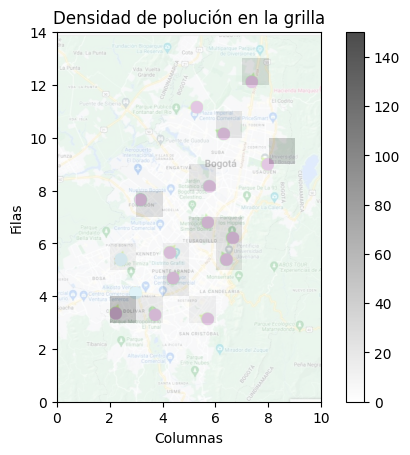

In [43]:
Mapa(grid,False,0)

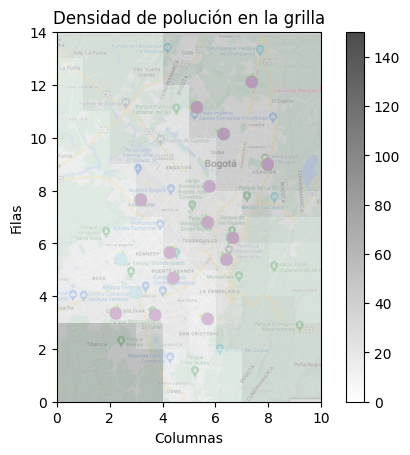

In [44]:
Mapa(grid_interpolated,False,0)

## Creación del gif

In [45]:
image_files = []
for hour in range(24):
    grid_interpolated = Grilla(df_enero22, coord, hour, True)    
    Mapa(grid_interpolated,True,hour) 
    image_files.append(f'Mapa_{hour}.png')

with imageio.get_writer('MapaPM10_22-1-2024.gif', mode='I', duration=1) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)   

/tmp/ipykernel_14031/3009266187.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
